In [1]:
from PIL import Image
from IPython.display import Image as show_image
import numpy as np
import matplotlib.pyplot as plt

#sklearn models
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [2]:
#image
data_folder = 'ppl/'
name = 'cat01.jpg'
#number of clusters
n=5

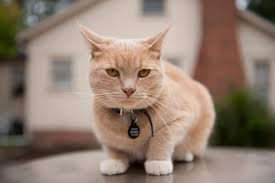

In [3]:
#open image and read dimentions
im = Image.open(data_folder+name)
pix_array = np.asarray(im)
x = np.shape(pix_array)[0]
y = np.shape(pix_array)[1]
show_image(data_folder+name)

In [4]:
#get features
x_data = []
for i in range(x):
    for j in range(y):
        temp = []
        temp.append(pix_array[i][j][0])
        temp.append(pix_array[i][j][1])
        temp.append(pix_array[i][j][2])
        #temp.append(pix_array[i][j][0]/max(1,pix_array[i][j][1]))
        #temp.append(pix_array[i][j][0]/max(1,pix_array[i][j][2]))
        #temp.append(pix_array[i][j][1]/max(1,pix_array[i][j][2]))
        #temp.append(max(pix_array[i][j][0],pix_array[i][j][1],pix_array[i][j][2]))
        #temp.append(i)
        #temp.append(j)
        x_data.append(temp)

### Kmeans

In [5]:
#train kmeans
kmeans = KMeans(n_clusters=n, init='random',  max_iter=100, n_init=50, algorithm='full').fit(x_data)
y_pred = kmeans.predict(x_data)


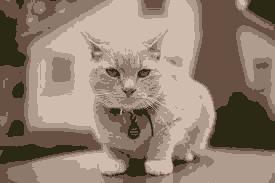

In [6]:
#save result
#take average of group as the colour
im_new = Image.new('RGB', (y,x))
pix_new = im_new.load()

for i in range(x):
    for j in range(y):
        temp_arr = kmeans.cluster_centers_[y_pred[i*y+j],0:3]
        r = int(temp_arr[0])
        g = int(temp_arr[1])
        b = int(temp_arr[2])
        pix_new[j,i] = (r,g,b)
        
new_file = data_folder+'km'+name
im_new.save(new_file)
show_image(new_file)

### GMM

In [7]:
#train gmm
gmm = GaussianMixture(n_components=n, n_init = 10, covariance_type = 'full', random_state = 42).fit(x_data)
y_pred = gmm.predict(x_data)

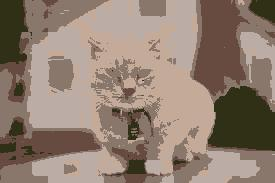

In [8]:
#save result
#take average of group as the colour
im_new = Image.new('RGB', (y,x))
pix_new = im_new.load()

for i in range(x):
    for j in range(y):
        temp_arr = gmm.means_[y_pred[i*y+j],0:3]
        r = int(temp_arr[0])
        g = int(temp_arr[1])
        b = int(temp_arr[2])
        pix_new[j,i] = (r,g,b)

new_file = data_folder+'gmm'+name     
im_new.save(new_file)
show_image(new_file)